<a href="https://colab.research.google.com/github/Nickimani/mini_DIVA/blob/main/main_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/Mini_DIVA'

Mounted at /content/drive
/content/drive/My Drive/Mini_DIVA


# My Notebook

In [ ]:
from utils import *
from tqdm import tqdm
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

## Evaluate imputation methods

### Evaluation function

In [ ]:
def evaluate_imputation_results(dataset):
    _, X, y, _, _ = read_dataset(dataset=dataset)

    # evaluate imputation results for different imputation methods and fractions of missing values
    impute_methods = ["zero", "mean", "median", "mode", "MICE"]
    impute_fractions = np.linspace(0.05, 0.60, 15)  # np.linspace(0.05, 0.45, 19)
    impute_seeds = np.arange(5)
    error_method = "mix"

    results = []
    for impute_method in impute_methods:
        for impute_fraction in tqdm(impute_fractions):
            for impute_seed in impute_seeds:
                try:
                    acc, error, _, _, _, _ = train_impute_classifier(
                        X,
                        y,
                        impute_method=impute_method,
                        error_method=error_method,
                        impute_fraction=impute_fraction,
                        random_state=impute_seed,
                    )

                    results.append(
                        [
                            impute_method,
                            impute_fraction,
                            impute_seed,
                            np.mean(acc),
                            np.mean(error),
                        ]
                    )

                except Exception as e:
                    print(e)
                    continue
        print(f"{impute_method} imputation done")
    return results

In [ ]:
# List of dataset names
dataset_list = ["iris", "credit", "monks", "dermatology"]

# Iterate through the datasets and store the results in a defaultdict
resultsdict = defaultdict(list)
for dataset in dataset_list:
    results = evaluate_imputation_results(dataset)
    # Create a DataFrame from the results list with the desired column names
    df = pd.DataFrame(
        results,
        columns=[
            "impute_method",
            "impute_fraction",
            "impute_seed",
            "accuracy",
            "error",
        ],
    )
    resultsdict[dataset].append(df)

100%|██████████| 15/15 [00:48<00:00,  3.26s/it]


zero imputation done


100%|██████████| 15/15 [00:46<00:00,  3.07s/it]


mean imputation done


100%|██████████| 15/15 [00:46<00:00,  3.12s/it]


median imputation done


100%|██████████| 15/15 [00:45<00:00,  3.06s/it]


mode imputation done


100%|██████████| 15/15 [00:59<00:00,  4.00s/it]


MICE imputation done


100%|██████████| 15/15 [01:00<00:00,  4.02s/it]


zero imputation done


100%|██████████| 15/15 [01:05<00:00,  4.39s/it]


mean imputation done


100%|██████████| 15/15 [01:04<00:00,  4.32s/it]


median imputation done


100%|██████████| 15/15 [01:02<00:00,  4.17s/it]


mode imputation done


100%|██████████| 15/15 [01:46<00:00,  7.11s/it]


MICE imputation done


100%|██████████| 15/15 [00:49<00:00,  3.28s/it]


zero imputation done


100%|██████████| 15/15 [00:50<00:00,  3.36s/it]


mean imputation done


100%|██████████| 15/15 [00:52<00:00,  3.48s/it]


median imputation done


100%|██████████| 15/15 [00:49<00:00,  3.30s/it]


mode imputation done


100%|██████████| 15/15 [01:03<00:00,  4.23s/it]


MICE imputation done


100%|██████████| 15/15 [01:04<00:00,  4.31s/it]


zero imputation done


100%|██████████| 15/15 [01:10<00:00,  4.71s/it]


mean imputation done


100%|██████████| 15/15 [01:10<00:00,  4.67s/it]


median imputation done


100%|██████████| 15/15 [01:09<00:00,  4.63s/it]


mode imputation done


100%|██████████| 15/15 [04:14<00:00, 16.99s/it]

MICE imputation done


In [ ]:
# create and print the dataframe for the imputation resulsts for different datasets
finalres = pd.DataFrame()
# resu = resultsdict[['credit','monks', 'dermatology']]
for k, v in resultsdict.items():
    for i in range(len(v)):
        data = v[i]
        data["Dataset_name"] = k
        finalres = pd.concat([finalres, data])

# finalres[(finalres.impute_method=='MICE') & (finalres.Dataset_name=='iris')]
finalres

,impute_method,impute_fraction,impute_seed,accuracy,error,Dataset_name
0,zero,0.05,0,0.946667,9.493793,iris
1,zero,0.05,1,0.953333,10.707384,iris
2,zero,0.05,2,0.953333,7.327407,iris
3,zero,0.05,3,0.940000,7.995484,iris
4,zero,0.05,4,0.953333,7.235162,iris
...,...,...,...,...,...,...
370,MICE,0.60,0,0.838356,1.000000,dermatology
371,MICE,0.60,1,0.852055,1.000000,dermatology
372,MICE,0.60,2,0.857534,1.000000,dermatology
373,MICE,0.60,3,0.832877,1.000000,dermatology


In [ ]:
finalres = finalres.reset_index()
finalres = finalres.drop("index", axis=1)

In [ ]:
# Create a subset of the datafrane to include impute method, dataset_name, and error
error = (
    finalres.groupby(["impute_method", "Dataset_name"])["error"].mean().reset_index()
)

In [ ]:
# Create a subset of the datfrane to include impute method, dataset_name, and error
accuracy = (
    finalres.groupby(["impute_method", "Dataset_name"])["accuracy"].mean().reset_index()
)

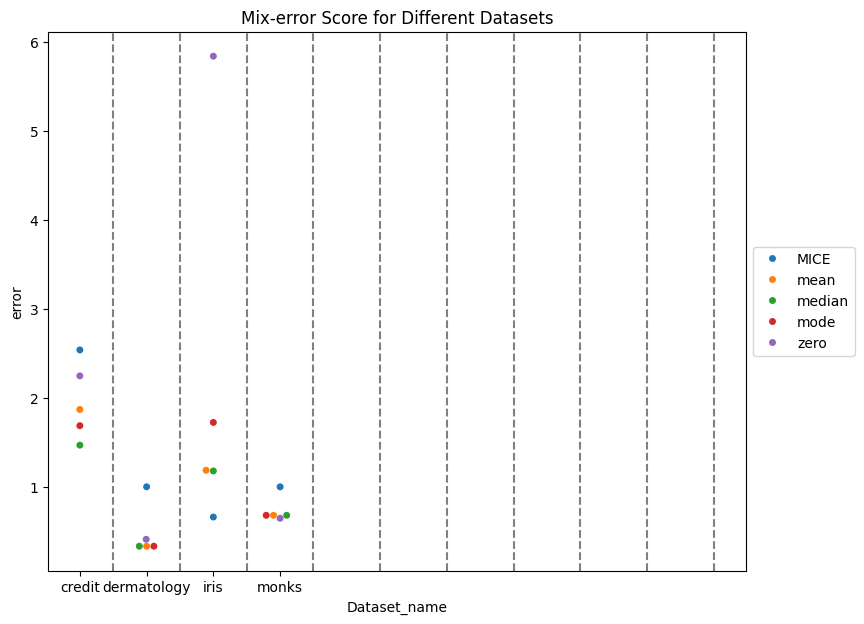

In [ ]:
# Produce a swarmplot for the methods
plt.figure(figsize=(9, 7))
sns.swarmplot(data=error, x="Dataset_name", y="error", hue="impute_method").set(
    title="Mix-error Score for Different Datasets"
)

# Add vertical lines to separate datasets
for i in range(len(k) - 1):
    plt.axvline(x=i + 0.5, linestyle="--", color="gray")
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left");
# plt.savefig(f'Error.png', dpi=300, bbox_inches='tight')

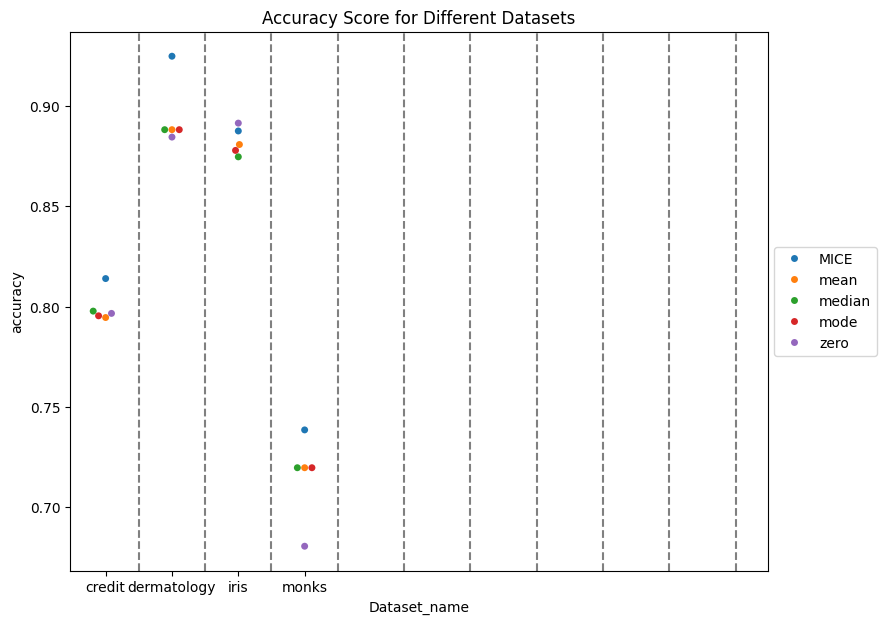

In [ ]:
# Produce a swarmplot for the methods
plt.figure(figsize=(9, 7))
sns.swarmplot(data=accuracy, x="Dataset_name", y="accuracy", hue="impute_method").set(
    title="Accuracy Score for Different Datasets"
)

# Add vertical lines to separate datasets
for i in range(len(k) - 1):
    plt.axvline(x=i + 0.5, linestyle="--", color="gray")
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left");
# plt.savefig(f'Accuracy.png', dpi=300, bbox_inches='tight')

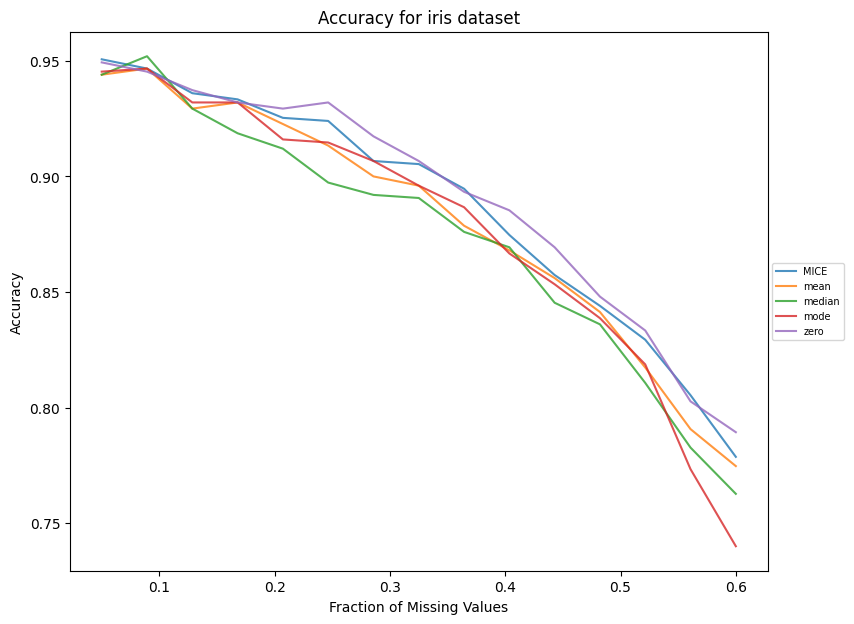

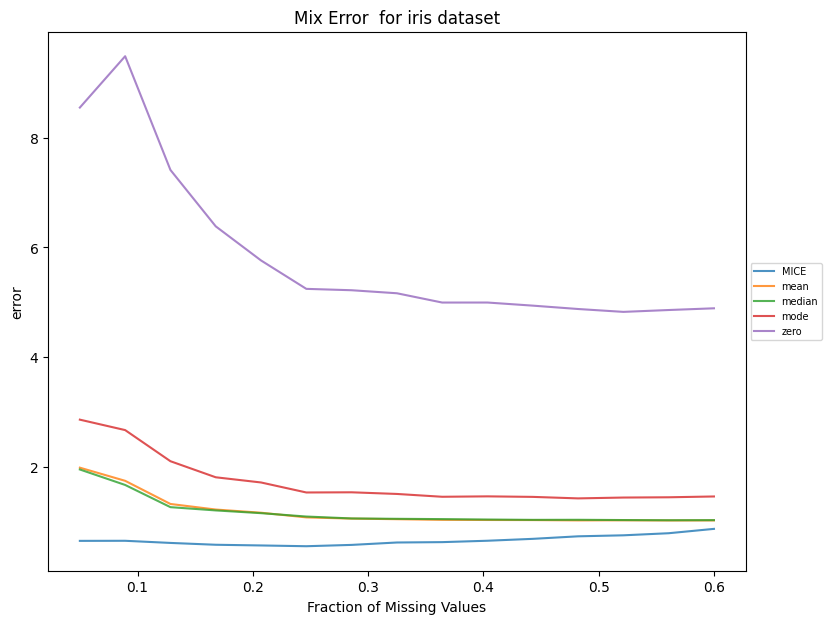

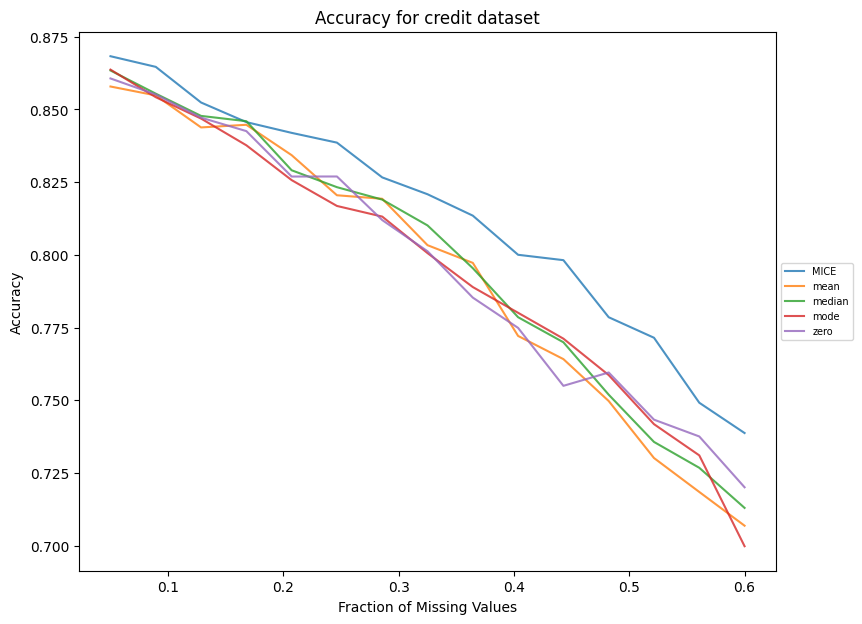

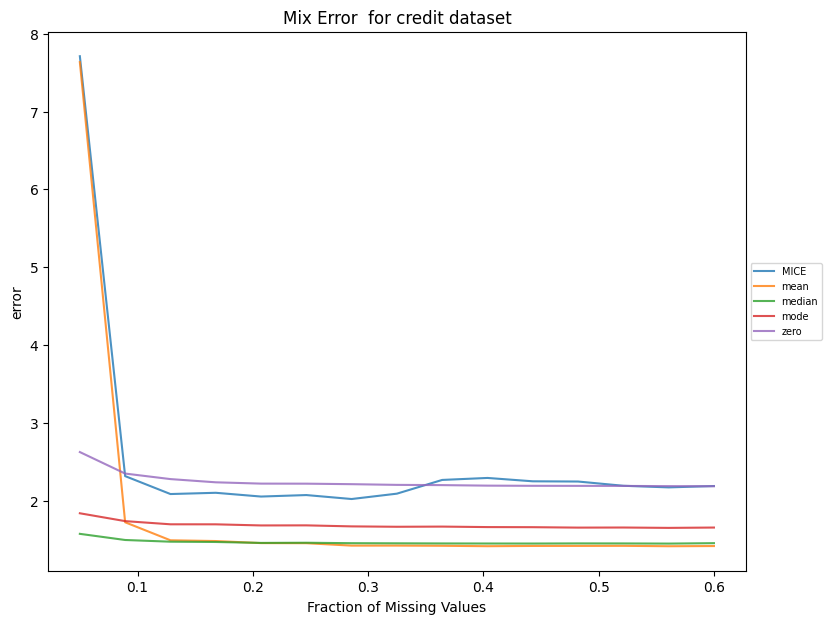

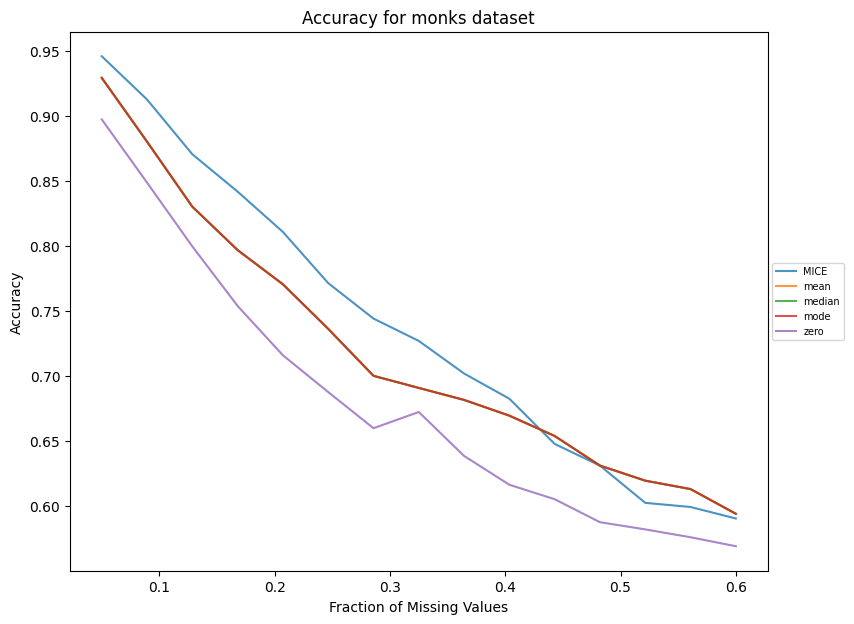

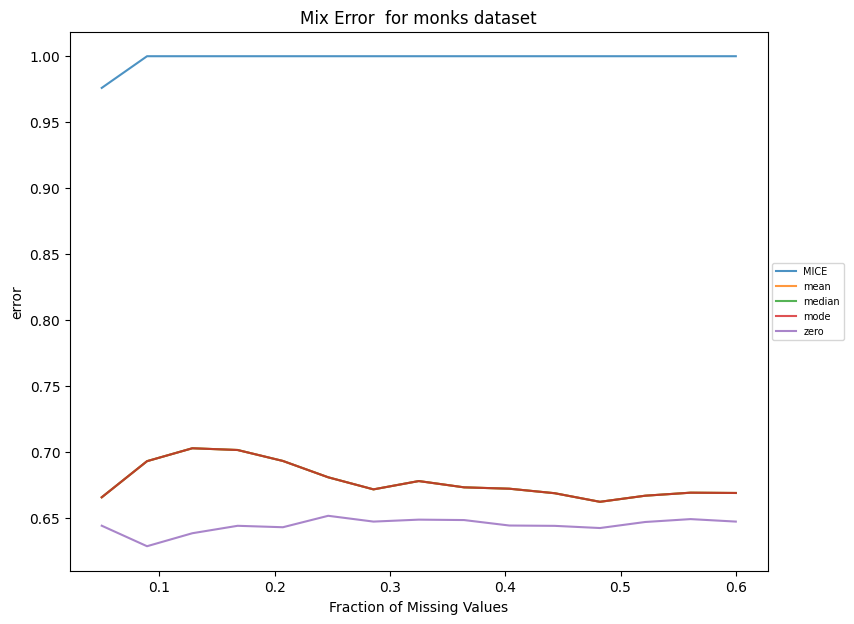

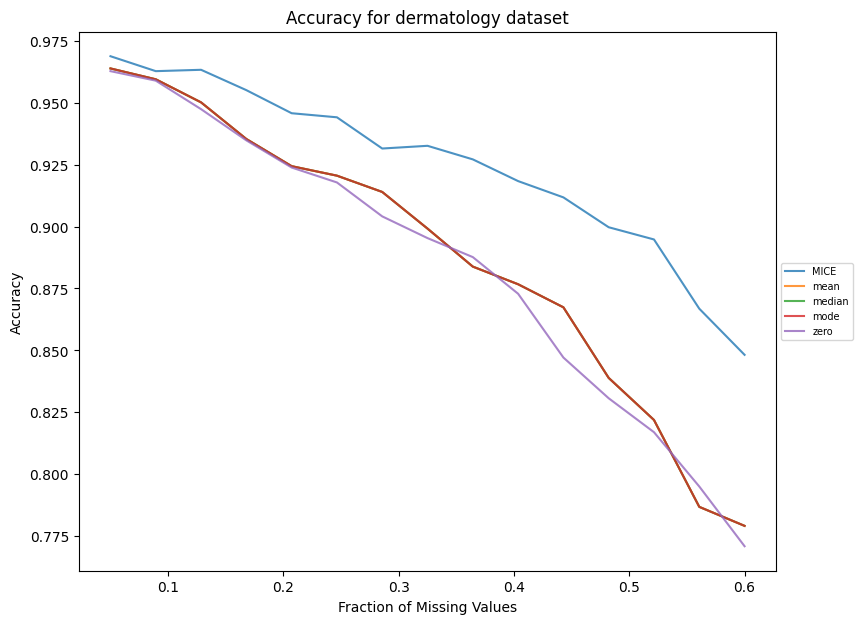

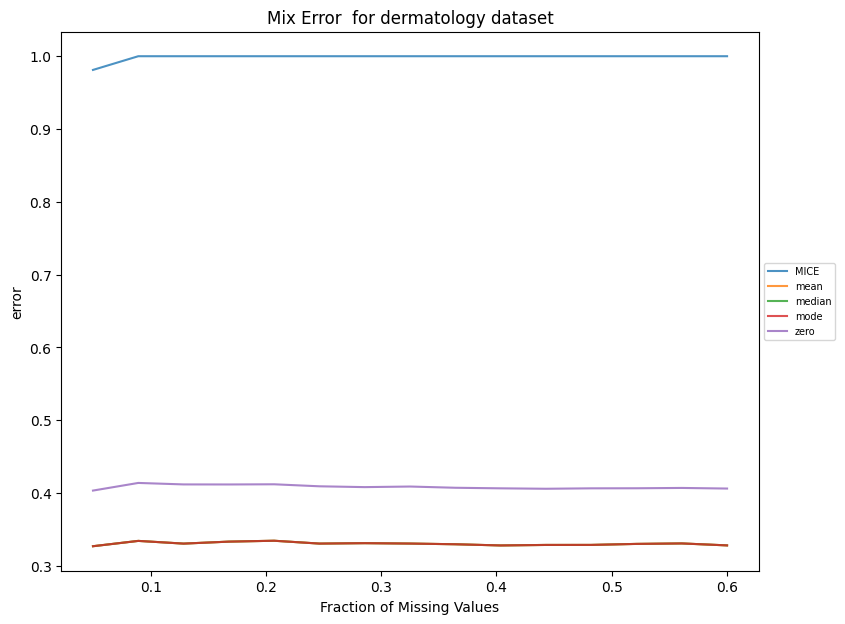

In [ ]:
# convert results to dataframe
for dataset in finalres.Dataset_name.unique():
    results_fractions_df = finalres[finalres["Dataset_name"] == dataset].drop(
        columns=["Dataset_name"]
    )

    # average over impute seeds
    results_fractions_df = (
        results_fractions_df.groupby(["impute_method", "impute_fraction"])
        .mean()
        .reset_index()
    )

    # plot results
    plt.figure(figsize=(9, 7))
    sns.lineplot(
        x="impute_fraction",
        y="accuracy",
        hue="impute_method",
        data=results_fractions_df,
        alpha=0.8,
    )
    plt.ylabel("Accuracy")
    plt.xlabel("Fraction of Missing Values")

    # only include first 9 entries in legend
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(bbox_to_anchor=(1, 0.5), fontsize=7, loc="center left")
    #     plt.yticks(np.arange(0.8, 1.05, 0.05))
    plt.title(f"Accuracy for {dataset} dataset")
    plt.savefig(f"Accuracy_{dataset}.png", dpi=300, bbox_inches="tight")
    plt.show()

    plt.figure(figsize=(9, 7))
    sns.lineplot(
        x="impute_fraction",
        y="error",
        hue="impute_method",
        data=results_fractions_df,
        alpha=0.8,
    )
    #     plt.ylabel(f'{error_method.upper()} of Imputed Values')
    # plt.ylim(0, 2)
    plt.xlabel("Fraction of Missing Values")

    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(bbox_to_anchor=(1, 0.5), fontsize=7, loc="center left")
    plt.title(f"Mix Error  for {dataset} dataset")
    # plt.savefig(f'Error_{dataset}.png', dpi=300, bbox_inches='tight')
    plt.show()

In [ ]:
finalres[finalres["Dataset_name"] == dataset]

,impute_method,impute_fraction,impute_seed,accuracy,error,Dataset_name
1125,zero,0.05,0,0.964384,0.402500,dermatology
1126,zero,0.05,1,0.953425,0.431169,dermatology
1127,zero,0.05,2,0.964384,0.389988,dermatology
1128,zero,0.05,3,0.964384,0.396331,dermatology
1129,zero,0.05,4,0.967123,0.396611,dermatology
...,...,...,...,...,...,...
1495,MICE,0.60,0,0.838356,1.000000,dermatology
1496,MICE,0.60,1,0.852055,1.000000,dermatology
1497,MICE,0.60,2,0.857534,1.000000,dermatology
1498,MICE,0.60,3,0.832877,1.000000,dermatology


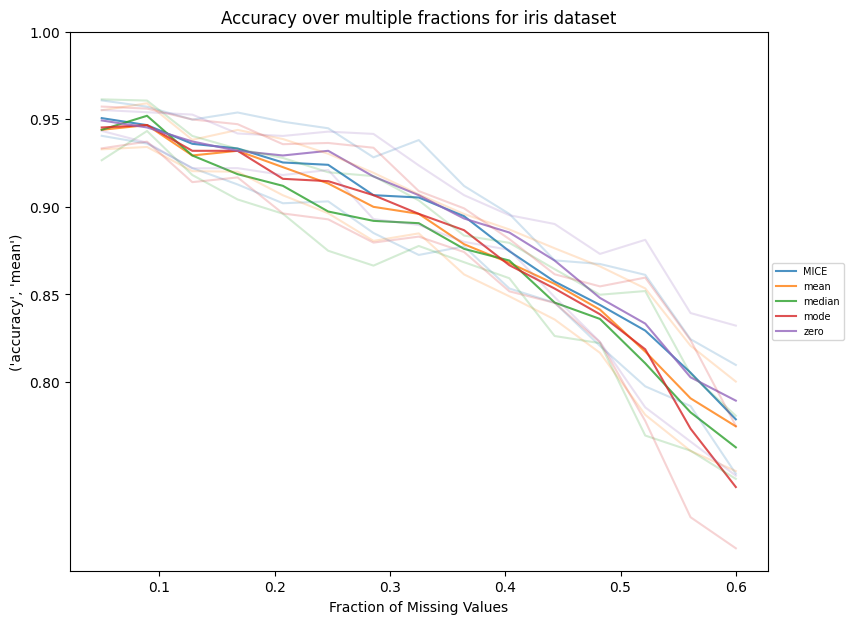

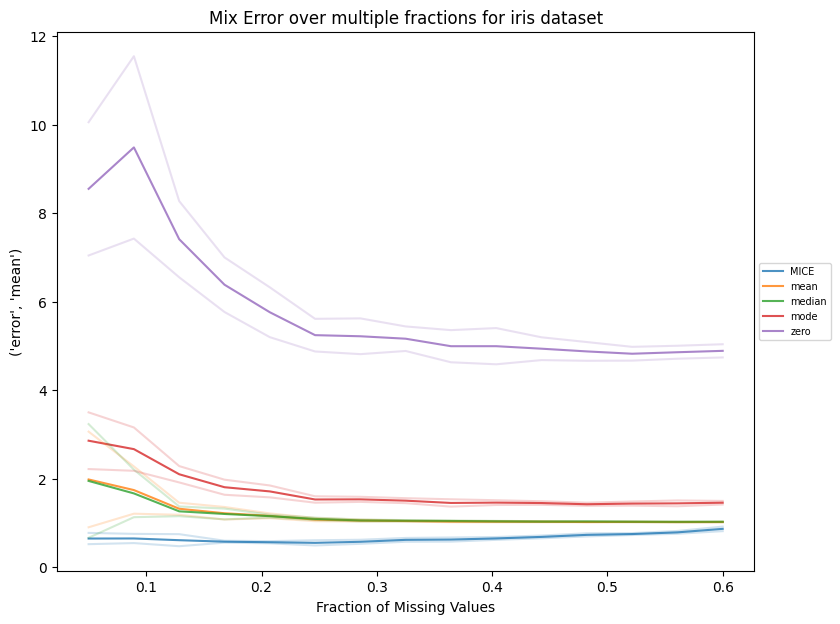

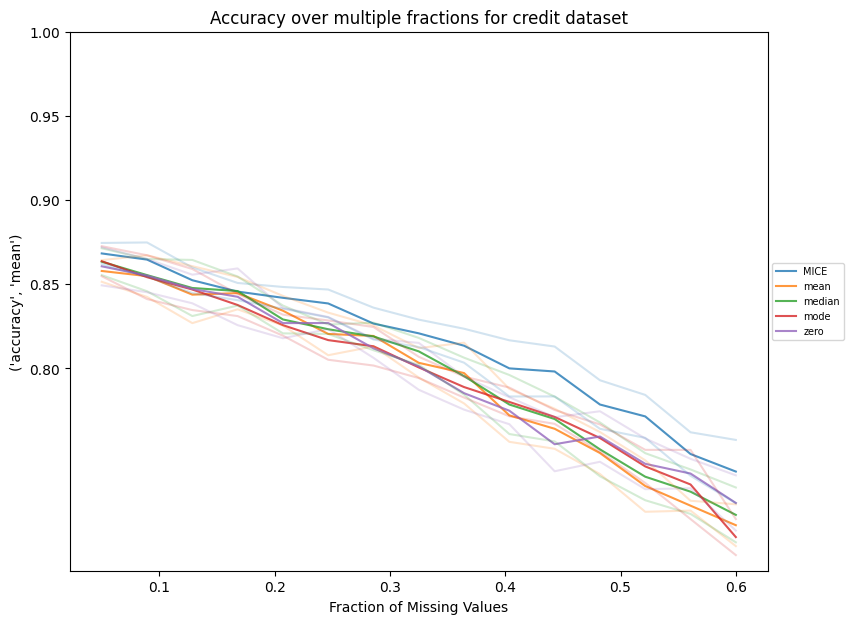

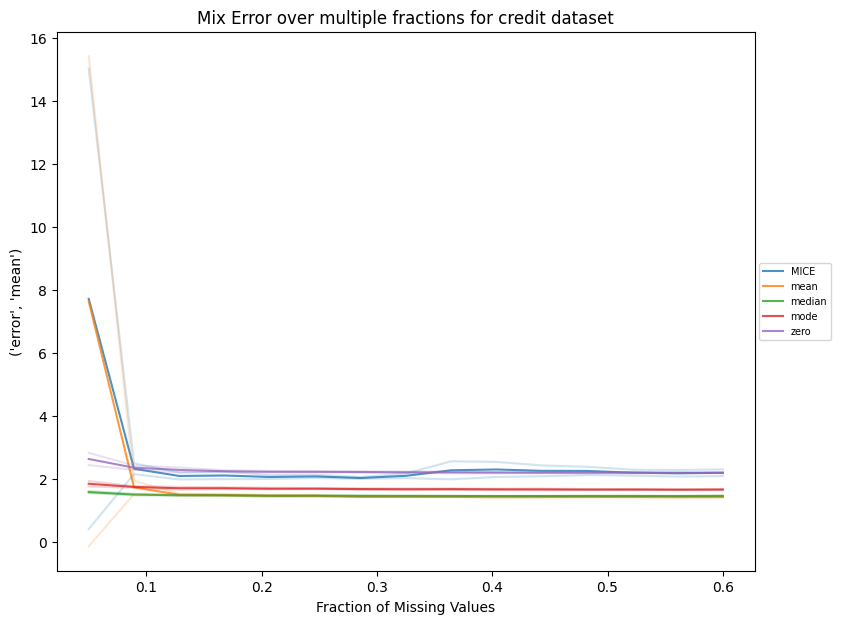

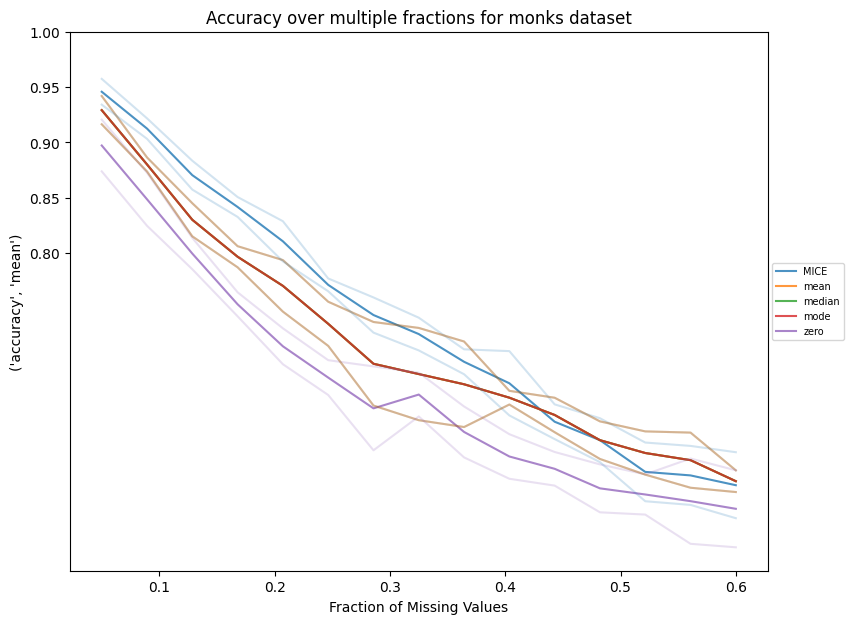

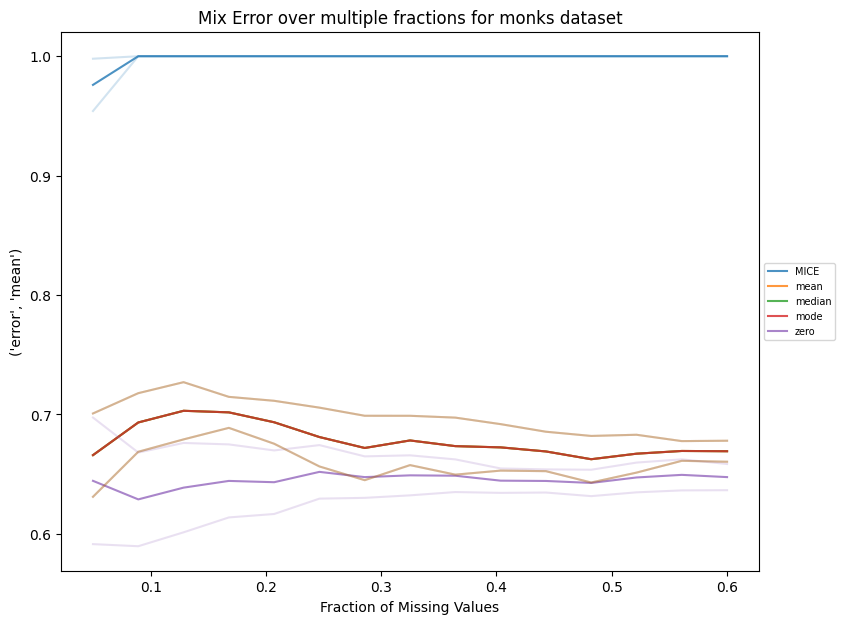

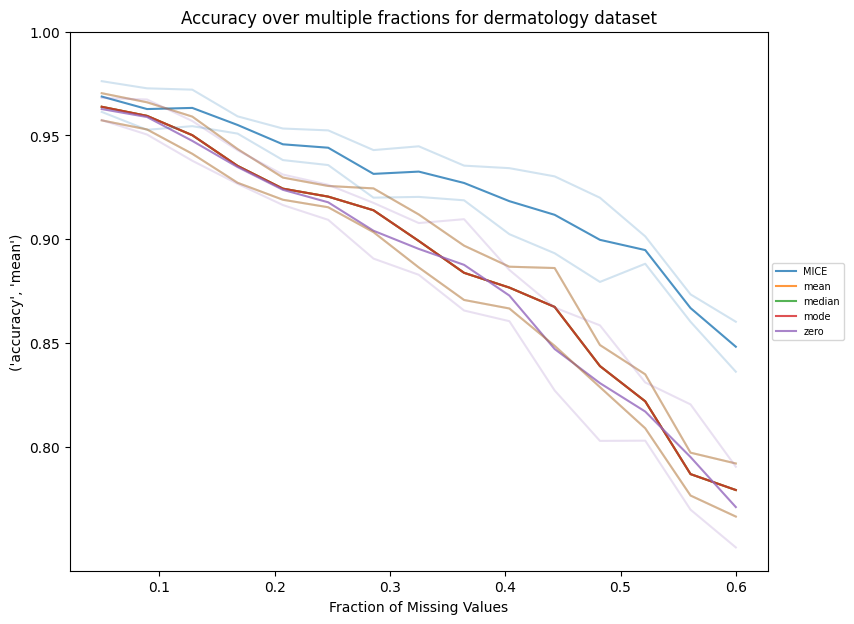

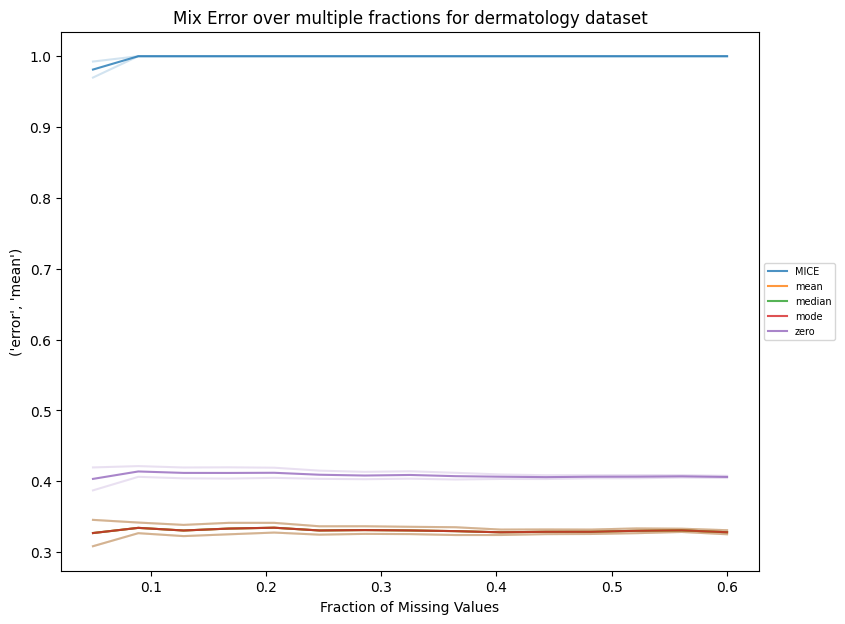

In [ ]:
# convert results to dataframe
for dataset in finalres.Dataset_name.unique():
    results_fractions_df = finalres[finalres["Dataset_name"] == dataset]

    # get mean and std of accuracy and rmse for each impute method and fraction
    results_fractions_df = (
        results_fractions_df.groupby(["impute_method", "impute_fraction"])
        .agg({"accuracy": ["mean", "std"], "error": ["mean", "std"]})
        .reset_index()
    )

    # add upper and lower confidence intervals to dataframe
    results_fractions_df[("accuracy", "lower_ci")] = (
        results_fractions_df[("accuracy", "mean")]
        - results_fractions_df[("accuracy", "std")]
    )
    results_fractions_df[("accuracy", "upper_ci")] = (
        results_fractions_df[("accuracy", "mean")]
        + results_fractions_df[("accuracy", "std")]
    )
    results_fractions_df.loc[
        results_fractions_df[("accuracy", "upper_ci")] > 1, ("accuracy", "upper_ci")
    ] = 1  # set upper confidence interval to 1 if it is greater than 1
    results_fractions_df[("error", "lower_ci")] = (
        results_fractions_df[("error", "mean")] - results_fractions_df[("error", "std")]
    )
    results_fractions_df[("error", "upper_ci")] = (
        results_fractions_df[("error", "mean")] + results_fractions_df[("error", "std")]
    )
    results_fractions_df.head()

    # plot mean of accuracy with std as error bars
    plt.figure(figsize=(9, 7))
    sns.lineplot(
        x="impute_fraction",
        y=("accuracy", "mean"),
        hue="impute_method",
        data=results_fractions_df,
        alpha=0.8,
    )
    sns.lineplot(
        x="impute_fraction",
        y=("accuracy", "upper_ci"),
        hue="impute_method",
        data=results_fractions_df,
        alpha=0.2,
    )
    sns.lineplot(
        x="impute_fraction",
        y=("accuracy", "lower_ci"),
        hue="impute_method",
        data=results_fractions_df,
        alpha=0.2,
    )

    # only include first 9 entries in legend
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(
        handles[:5],
        labels[:5],
        fontsize=7,
        bbox_to_anchor=(1, 0.5),
        loc="center left",
    )
    plt.yticks(np.arange(0.8, 1.05, 0.05))
    plt.xlabel("Fraction of Missing Values")
    plt.title(f"Accuracy over multiple fractions for {dataset} dataset")
    plt.savefig(f"Accuracy_multirun_{dataset}.png", dpi=300, bbox_inches="tight")
    # plt.yticks(np.arange(0.8, 1.05, 0.05))
    plt.show()

    # plot mean of mix error with std as error bars
    plt.figure(figsize=(9, 7))
    sns.lineplot(
        x="impute_fraction",
        y=("error", "mean"),
        hue="impute_method",
        data=results_fractions_df,
        alpha=0.8,
    )
    sns.lineplot(
        x="impute_fraction",
        y=("error", "upper_ci"),
        hue="impute_method",
        data=results_fractions_df,
        alpha=0.2,
    )
    sns.lineplot(
        x="impute_fraction",
        y=("error", "lower_ci"),
        hue="impute_method",
        data=results_fractions_df,
        alpha=0.2,
    )

    # only include first 9 entries in legend
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(
        handles[:5],
        labels[:5],
        fontsize=7,
        bbox_to_anchor=(1, 0.5),
        loc="center left",
    )
    plt.xlabel("Fraction of Missing Values")
    plt.title(f"Mix Error over multiple fractions for {dataset} dataset")
    plt.savefig(f"Error_multirun_{dataset}.png", dpi=300, bbox_inches="tight")
    # plt.ylim(0,)
    plt.show()